<a href="https://colab.research.google.com/github/karol10542/MyRepo/blob/main/plik_z_wykladu_simple_mnist_mdn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST dense net with Mixture Density Network
A skeleton!

Based on:
https://keras.io/examples/vision/mnist_convnet/ 

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt


## Prepare the data

In [ ]:

def prepare_data(x_train, y_train, x_test, y_test,num_classes):
  #Select 2 classes
  N_CLASSES = num_classes

  indices = np.where(y_train < N_CLASSES) # if few classes needed
  indices = indices[0]
  np.random.shuffle(indices)
  x_train = x_train[indices]
  y_train = y_train[indices]

  indices = np.where(y_test < N_CLASSES) # if few  classes only
  indices = indices[0]
  np.random.shuffle(indices)
  x_test = x_test[indices]
  y_test = y_test[indices]

  # Scale images to the [0, 1] range
  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255
  # Make sure images have shape (28, 28, 1)
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)
  print("x_train shape:", x_train.shape)
  print(x_train.shape[0], "train samples")
  print(x_test.shape[0], "test samples")


  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  return x_train, y_train, x_test, y_test

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, y_train, x_test, y_test = prepare_data(x_train, y_train, x_test, y_test,num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **Install keras-mdn-layer**

In [ ]:
! pip install keras-mdn-layer
import mdn

Parameters for MDN

In [ ]:
N_HIDDEN = 256 #256  # number of hidden units in the Dense layer
N_MIXES = 1  # number of mixture components
OUTPUT_DIMS = num_classes  # number of real-values predicted by each mixture component


## Build the model

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(layers.Flatten())
model.add(layers.Dense(N_HIDDEN, activation="relu"))
model.add(layers.Dense(N_HIDDEN, activation="relu"))

model.add(layers.Dense(N_HIDDEN, activation="relu"))
model.add(mdn.MDN(OUTPUT_DIMS, N_MIXES))
#model.add(layers.Dense(OUTPUT_DIMS, activation="softmax"))


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
mdn_4 (MDN)                  (None, 21)                5397      
Total params: 337,941
Trainable params: 337,941
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
batch_size = 128
epochs = 30

# This is for normal dense network
model.compile(loss=mdn.get_mixture_loss_func(OUTPUT_DIMS,N_MIXES), optimizer="adam", metrics=["accuracy"])


model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test)) #validation_split=0.1)

Epoch 1/30
469/469 [==============================] - 5s 7ms/step - loss: -6.8289 - accuracy: 0.6565 - val_loss: -15.9279 - val_accuracy: 0.9244
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: -16.1104 - accuracy: 0.8940 - val_loss: -19.7085 - val_accuracy: 0.9449
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: -17.3691 - accuracy: 0.8771 - val_loss: -20.6067 - val_accuracy: 0.9507
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: -21.0807 - accuracy: 0.9495 - val_loss: -23.0172 - val_accuracy: 0.9517
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: -20.1421 - accuracy: 0.8963 - val_loss: -21.3728 - val_accuracy: 0.8811
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: -18.8239 - accuracy: 0.8425 - val_loss: -20.9747 - val_accuracy: 0.9537
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: -22.1587 - accuracy: 0.9398 - val_loss: -22.4108 - 

# **Model prediction with MDN**

In [ ]:
y_test_out = model.predict(x_test[1:2])

print(y_test_out )



[[ 1.3842275e-03  2.9317469e-03  1.6079121e-03  2.3137638e-04
   1.1050313e-03 -1.4641974e-03  1.6903763e-03  2.4303626e-03
   9.3777198e-01 -4.9099326e-04  3.7387609e-03  1.6475916e-03
   3.7432909e-03  2.7938724e-02  1.7662644e-03  1.2983620e-02
   3.7859082e-03  4.2087436e-03  1.6652668e-01  9.2785954e-03
   1.4604034e-01]]


In [ ]:

mus= y_test_out[:,: N_MIXES*OUTPUT_DIMS]

sigs = y_test_out[:,N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]

print(mus)
print(sigs)

[[ 1.3842275e-03  2.9317469e-03  1.6079121e-03  2.3137638e-04
   1.1050313e-03 -1.4641974e-03  1.6903763e-03  2.4303626e-03
   9.3777198e-01 -4.9099326e-04]]
[[0.00373876 0.00164759 0.00374329 0.02793872 0.00176626 0.01298362
  0.00378591 0.00420874 0.16652668 0.0092786 ]]


NameError: ignored

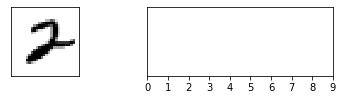

In [ ]:
# use the model to predict the labels of the test data



# Plot the prediction
fig = plt.figure(figsize=(8, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
n_img=30
for i in range(n_img):
    ax = fig.add_subplot(n_img, 3, 3*i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    ax = fig.add_subplot(n_img, 3, 3*i + 2, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,musf[i],yerr=sigsf[i],xerr=0.3,)
    #ax.bar(xbar,y_test_out[i],yerr=0,xerr=0.3,)
    ax.axis('off')

    ax = fig.add_subplot(n_img, 3, 3*i + 3, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,y_test[i],yerr=0.0,xerr=0.3)
    ax.axis('off')

    #print(mus[i])
    #print(sigs[i])
    #print(pis[i])

#print("Average error on probability = ",np.mean(sigs))    

# **Load fashion MNIST**

In [ ]:
# Model / data parameters
num_classes_f = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(xf_train, yf_train), (xf_test, yf_test) = keras.datasets.fashion_mnist.load_data()

xf_train, yf_train, xf_test, yf_test = prepare_data(xf_train, yf_train, xf_test, yf_test, num_classes)

# **Test fashion MNIST using the network trained on digits**

In [ ]:
yf_test_out = model.predict(xf_test)


In [ ]:
musf= y_test_out[:,: N_MIXES*OUTPUT_DIMS]

sigsf = y_test_out[:,N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]


IndexError: ignored

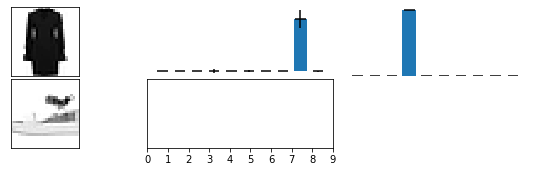

In [ ]:
# use the model to predict the labels of the test data



# Plot the prediction
fig = plt.figure(figsize=(8, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
n_img=30
for i in range(n_img):
    ax = fig.add_subplot(n_img, 3, 3*i + 1, xticks=[], yticks=[])
    ax.imshow(xf_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    ax = fig.add_subplot(n_img, 3, 3*i + 2, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,musf[i],yerr=sigsf[i],xerr=0.3)  #,yerr=sigsf[i]
    ax.axis('off')

    ax = fig.add_subplot(n_img, 3, 3*i + 3, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,yf_test[i],yerr=0.0,xerr=0.3)
    ax.axis('off')

    

#print("Average error on probability = ",np.mean(sigsf))    